<h1 align="center"> Classification </h1>
<h3 align="center"> Evan Ditter </h3>
<h3 align="center">March 4, 2019</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Overview

In this lab I will analyze the question: **Can you predict who would be interested in buying a caravan insurance policy and give an explanation**. This question is explored through classification using bagging, booting and random forests of data collected on the customerbase for an insurance company's "caravan insurance" policy. This can be viewed in more detail in the models section.

**References and Sources:**
* Data sourced from: https://www.kaggle.com/uciml/caravan-insurance-challenge/version/1
*P. van der Putten and M. van Someren (eds) . CoIL Challenge 2000: The Insurance Company Case. Published by Sentient Machine Research, Amsterdam. Also a Leiden Institute of Advanced Computer Science Technical Report 2000-09. June 22, 2000.*
* Referenced: https://github.com/jayanttikmani/cross-sellingCaravanInsuranceUsingDataMining
* Code referenced: https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
* Code referenced: https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
* Code refernced: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

## Data

**Definitions**
* **Under-sampling** - The selection of fewer samples from a specific class than another for the creation of a model. This allows that class to be less heavily weighted than some other class.
* **Over-sampling** - The selection of more samples from a specific class than another for the creation of a model. This allows that class to be more heavily weighted than some other class.
* **SMOTE** - Synthetic Minority Over-sampling TechniquE is an over-samping method by which a dataset may help weight a factor in a dataset by creating synthetic datapoints based on real observations.

As stated at the data source: "this data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?"(P. van der Putten et al). As stated in the references, one can download the utilized data set from https://www.kaggle.com/uciml/caravan-insurance-challenge/version/1. The meaning of columns can also be taken from this link.

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("caravan-insurance-challenge.csv")
train = df[df["ORIGIN"] == "train"]
test = df[df["ORIGIN"] == "test"]
train.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [3]:
test.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
5822,test,33,1,4,2,8,0,6,0,3,...,0,0,0,1,0,0,0,0,0,0
5823,test,6,1,3,2,2,0,5,0,4,...,0,0,0,1,0,0,0,0,0,1
5824,test,39,1,3,3,9,1,4,2,3,...,0,0,0,1,0,0,0,0,0,0
5825,test,9,1,2,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
5826,test,31,1,2,4,7,0,2,0,7,...,0,0,0,1,0,0,0,0,0,0


The data set, seen above consists of 9821 observations from a training and test set. Observations can be differentiated by their value in the "ORIGIN" column. All of the various columns have meanings that can be looked up at the aforementioned link above. The last column, which reads 1 or 0 where 1 indicates purchased insurances and 0 indicates no purchase of insurance. Only the training data will be used for model creation and fitness will be tested against the test data.

Not purchased 5474
Purchased: 348


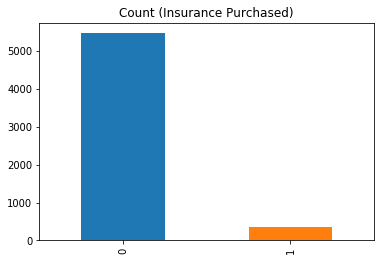

In [4]:
target_count = train.CARAVAN.value_counts()
print('Not purchased', target_count[0])
print('Purchased:', target_count[1])
target_count.plot(kind='bar', title='Count (Insurance Purchased)');

As one can see by this bar graph, this dataset is very unbalanced, so several models will be generated to account for this.

## Models

Due to the unbalanced nature of this dataset, I must sample so that I train on approximately equal fail and success rates. The tables below are in the form 

true negative   false positive<br/>
false negative   true positive

### Bagging

**Unbalanced**

In [5]:
x_test = test.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_test = test['CARAVAN']
train_0 = train[train['CARAVAN'] == 0]
train_1 = train[train['CARAVAN'] == 1]

In [6]:
# Formatting
x_train = train.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train['CARAVAN']

# Model Creation
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))


# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.925
[[3682   80]
 [ 220   18]]


The unbalanced data seems to predict mostly correct, however this is simply due to the fact that almost no positives are ever estimated, this model is only valid if no one wants insurance.

**Under-sampling**

In [7]:
# Undersampling
train_0_under = train_0.sample(target_count[1])
train_under = pd.concat([train_0_under, train_1], axis=0)

# Formatting
x_train = train_under.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train_under['CARAVAN']

# Model Creation
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.70025
[[2672 1090]
 [ 109  129]]


As one can see, bootstrap undersampling causes a large number of false positives, but steers relatively clear of false positives. This model can work, but has a very bad accuracy.

**Over-sampling**

In [8]:
# Oversampling
train_1_over = train_1.sample(target_count[0], replace=True)
train_over = pd.concat([train_1_over, train_0], axis=0)

# Formatting
x_train = train_over.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train_over['CARAVAN']

# Model Creation
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.89775
[[3561  201]
 [ 208   30]]


This method resulted in a mix of false positive and negatives while producing almost no true positives. This model is seemingly better, but still does not very accurately estimate.

**SMOTE**

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')

x_train = train.drop(["ORIGIN", "CARAVAN"], axis = 1)
y_train = train["CARAVAN"]

x_sm, y_sm = smote.fit_sample(x_train, y_train)

model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_sm, y_sm)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.9185
[[3649  113]
 [ 213   25]]


This model is comparable to oversampling, but has a lower rate of false positives, making this a slightly more robust model.

### Random Forest

I will now run Random Forest to make this estimation. The number of predictors used in all cases is 10.

**Unbalanced**

In [10]:
x_test = test.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_test = test['CARAVAN']
train_0 = train[train['CARAVAN'] == 0]
train_1 = train[train['CARAVAN'] == 1]

In [11]:
# Formatting
x_train = train.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train['CARAVAN']

# Model Creation
model = RandomForestClassifier(n_estimators = 10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))


# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.928
[[3698   64]
 [ 224   14]]


Unbalanced random forests create a reasonable model, but still suffers against false positives far outweighing true positives.

**Under-sampling**

In [12]:
# Undersampling
train_0_under = train_0.sample(target_count[1])
train_under = pd.concat([train_0_under, train_1], axis=0)

# Formatting
x_train = train_under.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train_under['CARAVAN']

# Model Creation
model = RandomForestClassifier(n_estimators = 10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.693
[[2638 1124]
 [ 104  134]]


The number of false positives generated by undersampling is, yet again, immense. This is problematic for predictions. 

**Over-sampling**

In [13]:
# Oversampling
train_1_over = train_1.sample(target_count[0], replace=True)
train_over = pd.concat([train_1_over, train_0], axis=0)

# Formatting
x_train = train_over.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train_over['CARAVAN']

# Model Creation
model = RandomForestClassifier(n_estimators = 10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.91525
[[3634  128]
 [ 211   27]]


These results are only slightly better than bagging's over-sample model. The issue of false positives outweighting true is still a large issue.

**SMOTE**

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')

x_train = train.drop(["ORIGIN", "CARAVAN"], axis = 1)
y_train = train["CARAVAN"]

x_sm, y_sm = smote.fit_sample(x_train, y_train)

model = RandomForestClassifier(n_estimators = 10)
model.fit(x_sm, y_sm)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.9245
[[3684   78]
 [ 224   14]]


The SMOTE method in random forests suffers the least from the issue of false positives, but still fails to accurately estimate whether someone will buy caravan insurance with a still huge number of false negatives.

### Boosting

**Unbalanced**

In [15]:
x_test = test.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_test = test['CARAVAN']
train_0 = train[train['CARAVAN'] == 0]
train_1 = train[train['CARAVAN'] == 1]

In [16]:
# Formatting
x_train = train.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train['CARAVAN']

# Model Creation
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))


# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.93875
[[3751   11]
 [ 234    4]]


Unbalanced boosting provides very few positives at all, with only 4 true positives this method essentially does not estimate at all.

**Under-sampling**

In [17]:
# Undersampling
train_0_under = train_0.sample(target_count[1])
train_under = pd.concat([train_0_under, train_1], axis=0)

# Formatting
x_train = train_under.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train_under['CARAVAN']

# Model Creation
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.6725
[[2551 1211]
 [  99  139]]


The huge number of false positives in this model greatly offset the higher number of true positives than false negatives. This will result in almost all positive results actually being negative.

**Over-sampling**

In [18]:
# Oversampling
train_1_over = train_1.sample(target_count[0], replace=True)
train_over = pd.concat([train_1_over, train_0], axis=0)

# Formatting
x_train = train_over.drop(['ORIGIN', 'CARAVAN'], axis = 1)
y_train = train_over['CARAVAN']

# Model Creation
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.7175
[[2738 1024]
 [ 106  132]]


The same issue persists in oversampling as was in under. This seems to be a pervasive problem with boosting.

**SMOTE**

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')

x_train = train.drop(["ORIGIN", "CARAVAN"], axis = 1)
y_train = train["CARAVAN"]

x_sm, y_sm = smote.fit_sample(x_train, y_train)

model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy: ", model.score(x_test, y_test))

# Code to generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  0.93875
[[3751   11]
 [ 234    4]]


Smote causes similar results to unbalanced in this case, greater complexity for no real result.

## Conclusions

The question this lab intended to answer was: Can you predict who would be interested in buying a caravan insurance policy and give an explanation. Based on this result I would say that you kind of can. None of the above models produces more true positives than false negatives and false positives. This is an issue in that targeted advertizing is guaranteedly going to miss more or hit more than the people who actually want the insurance. However, depending on the overheads for advertizing, one could argue that false positives are relatively inconsequential. Based on this under or over-sampling using boosting could be said to predict well enough to warrant use of this method to advertise insurance. Further work could be done with a cost analysis of advertizing against the false positive rate.

One thing that can be noticed, is that the methods of data normalization seemed to have far more consistant results across modeling methods than the results of each modeling method had across data normallization. This would indicate that it does not matter as much how one creates a model as it does the data one feeds into said model.